In [1]:
import time

start_time = '2023-06-08 15:28:08'
end_time =  '2023-06-09 16:51:16'

start_timestamp = time.strptime(start_time, "%Y-%m-%d %H:%M:%S")
end_timestamp = time.strptime(end_time, "%Y-%m-%d %H:%M:%S")

In [2]:
start_timestamp < end_timestamp

True

In [3]:
from tqdm import tqdm

with open('bert_bilstm_crf.log', 'r', encoding='gbk') as f:
    txt = f.readlines()

In [4]:
len(txt)

102662

In [5]:
import numpy as np 
import re
import time

start_time = '2023-06-08 15:28:08'
end_time =  '2023-06-09 16:51:16'

start_timestamp = time.strptime(start_time, "%Y-%m-%d %H:%M:%S")
end_timestamp = time.strptime(end_time, "%Y-%m-%d %H:%M:%S")

count = 0
epoch_loss = np.zeros(10)
for line in tqdm(txt):
    try:
        tm = line.split(' ')[0] + ' ' + line.split(' ')[1]
        tm = time.strptime(tm, "%Y-%m-%d %H:%M:%S")
        if start_timestamp <= tm and tm <= end_timestamp and "Epoch" in line:
            pattern = re.compile(r'(?<=Epoch: )\d')
            index = pattern.findall(line)[0]
            pattern_2 = re.compile(r'(?<=Loss:)\d+\.?\d*')
            loss = pattern_2.findall(line)[0]
            epoch_loss[int(index)] += float(loss)
    except:
        pass

epoch_loss /= 3166

100%|██████████| 102662/102662 [00:01<00:00, 69388.11it/s]


In [9]:
import numpy as np 
import re

# with open('bert_cnn_3.log', 'r', encoding='gbk') as f:
#     txt = f.readlines()

start_time = "2023-06-10 12:33:18"
end_time =  "2023-06-10 19:52:09"

start_timestamp = time.strptime(start_time, "%Y-%m-%d %H:%M:%S")
end_timestamp = time.strptime(end_time, "%Y-%m-%d %H:%M:%S")

count = 0
my_epoch_loss = np.zeros(10)
my_first_cls_loss = np.zeros(10)
my_loc_loss = np.zeros(10)
my_final_cls_loss = np.zeros(10)
flag = 1
for line in tqdm(txt):
    if flag == 1:
        try:
            tm = line.split(' ')[0] + ' ' + line.split(' ')[1]
            tm = time.strptime(tm, "%Y-%m-%d %H:%M:%S")
            if start_timestamp <= tm and tm <= end_timestamp and "Epoch" in line:
                pattern = re.compile(r'(?<=Epoch: )\d')
                index = pattern.findall(line)[0]
                pattern_2 = re.compile(r'(?<=Loss:).*')
                loss = pattern_2.findall(line)[0]
                if np.isnan(float(loss)):
                    loss = 0
                my_epoch_loss[int(index)] += float(loss) / 3166
                flag = 0
        except:
            pass
    else:
        pattern_2 = re.compile(r'(?<=First_cls_loss: )\d+\.?\d*')
        loss = pattern_2.findall(line)[0]
        if np.isnan(float(loss)):
            loss = 0
        my_first_cls_loss[int(index)] += float(loss) / 3166
        pattern_2 = re.compile(r'(?<=Loc_loss: )\d+\.?\d*')
        loss = pattern_2.findall(line)[0]
        if np.isnan(float(loss)):
            loss = 0
        my_loc_loss[int(index)] += float(loss) / 3166
        pattern_2 = re.compile(r'(?<=Final_cls_loss: ).*')
        loss = pattern_2.findall(line)[0]
        if np.isnan(float(loss)):
            loss = 0
        my_final_cls_loss[int(index)] += float(loss) / 3166
        flag = 1

100%|██████████| 102662/102662 [00:01<00:00, 53554.44it/s]


In [43]:
string = "First_cls_loss: 0.05748379975557327	Loc_loss: 0.11533717811107635	Final_cls_loss: 6.923364708200097e-05"
pattern_2 = re.compile(r'(?<=Final_cls_loss: ).*')
loss = pattern_2.findall(string)[0]
print(loss)

6.923364708200097e-05


In [100]:
print(my_epoch_loss)
print(my_first_cls_loss)
print(my_loc_loss)
print(my_final_cls_loss)

[1.66749952 1.23733007 0.91573993 0.8599396  0.82733385 0.32659532
 0.1485115  0.09301662 0.06855908 0.05139681 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
[0.2695956  4.60828705 0.12833355 0.11851061 0.11370126 0.05752607
 0.03051028 0.02187608 0.01737752 0.0173157  0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
[0.82574328 0.72662044 0.55956398 0.53715156 0.52218084 0.18823464
 0.08210697 0.05359752 0.03639962 0.02928415 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
[0.57217674 0.30284709 0.2278424  0.20427742 0.19145525 0.08083461
 0.03589426 0.01754302 0.01478194 0.00811956 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


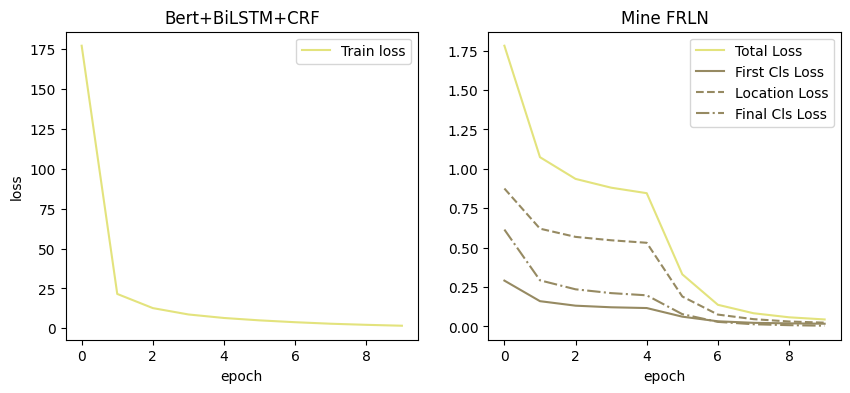

In [10]:
from matplotlib import pyplot as plt

color_set = {'Kraftime' : ('#E3E37D', '#968A62')}
set = color_set['Kraftime']

train_color = set[0]
dev_color = set[1]

axes = plt.subplots(1, 2)

epochs = [i for i in range(len(epoch_loss))]
plt.rcParams['figure.figsize']=(10, 4)
plt.subplot(1, 2, 1)
plt.plot(epochs, epoch_loss, color=train_color, label="Train loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("Bert+BiLSTM+CRF")
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
epochs = [i for i in range(len(my_epoch_loss))]
plt.plot(epochs, my_epoch_loss, color=train_color, label="Total Loss")
plt.plot(epochs, my_first_cls_loss, color=dev_color, linestyle="-", label="First Cls Loss")
plt.plot(epochs, my_loc_loss, color=dev_color, linestyle="--", label="Location Loss")
plt.plot(epochs, my_final_cls_loss, color=dev_color, linestyle="-.", label="Final Cls Loss")
plt.xlabel("epoch")
plt.title("Mine FRLN")
plt.legend(loc='upper right')
plt.savefig('loss_plot.svg')